In [963]:
PREDICTION_YEAR = 2024

In [964]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge
import matplotlib.pyplot as plt
from typing import NamedTuple

In [965]:
class PredictionResult(NamedTuple):
    turnover_rate: float
    births: int
    deaths: int
    population: int
    discharges_and_deaths_in_hospital: int
    hospital_beds: int
    total_nurses: int
    leaving_nurses: int

In [966]:
dataframe = pd.read_csv("dataset.csv")

# Factors
year = np.array(dataframe["year"])

# Prediction result
turnover_rate = np.array(dataframe["turnover_rate"])
births = np.array(dataframe["births"])
deaths = np.array(dataframe["deaths"])
population = np.array(dataframe["population"])
discharges_and_deaths_in_hospital = np.array(
    dataframe["discharges_and_deaths_in_hospital"]
)
hospital_beds = np.array(dataframe["hospital_beds"])
total_nurses = np.array(dataframe["total_nurses"])

In [967]:
X = year.reshape(-1, 1)
Y = np.concatenate(
    [
        turnover_rate.reshape(-1, 1),
        births.reshape(-1, 1),
        deaths.reshape(-1, 1),
        population.reshape(-1, 1),
        discharges_and_deaths_in_hospital.reshape(-1, 1),
        hospital_beds.reshape(-1, 1),
        total_nurses.reshape(-1, 1),
    ],
    axis=1,
)

In [968]:
def predict(model, prediction_year):
    prediction = model.predict(np.append(year, prediction_year).reshape(-1, 1))

    return list(
        map(
            lambda x: PredictionResult(
                turnover_rate=x[0],
                births=int(x[1]),
                deaths=int(x[2]),
                population=int(x[3]),
                discharges_and_deaths_in_hospital=int(x[4]),
                hospital_beds=int(x[5]),
                total_nurses=int(x[6]),
                leaving_nurses=int(x[0] * x[6]),
            ),
            prediction,
        )
    )

In [969]:
def plot_graph(
    title, prediction_year, prediction_results, get_prediction_field=lambda x: x.leaving_nurses
):
    leaving_nurses = turnover_rate * total_nurses
    plt.scatter(year, leaving_nurses)
    plt.scatter(
        [prediction_year], list(map(get_prediction_field, prediction_results))[-1]
    )
    plt.plot(
        np.append(year, prediction_year).reshape(-1, 1),
        list(map(get_prediction_field, prediction_results)),
        color="blue",
        linewidth=3,
    )
    plt.title(title)
    plt.xlabel("Year")
    plt.ylabel("Leaving Nurses")
    plt.show()

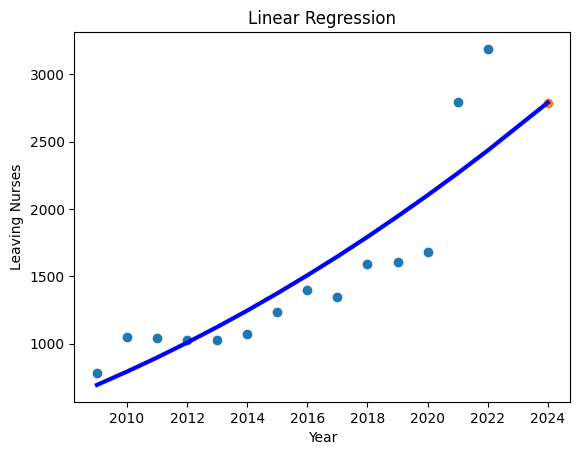

PredictionResult(turnover_rate=0.08809230769230769, births=37353, deaths=51392, population=7626039, discharges_and_deaths_in_hospital=1927075, hospital_beds=30239, total_nurses=31680, leaving_nurses=2790)


In [970]:
# Linear regression
model = LinearRegression(fit_intercept=True)
model.fit(X, Y)
plot_graph("Linear Regression", PREDICTION_YEAR, predict(model, PREDICTION_YEAR))
print(predict(model, PREDICTION_YEAR)[-1])

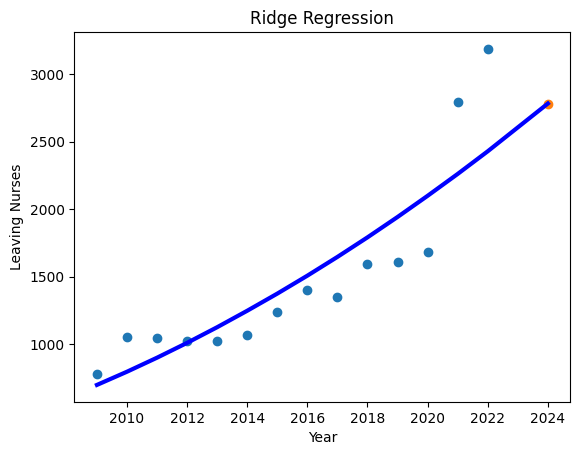

PredictionResult(turnover_rate=0.08796623944982773, births=37483, deaths=51365, population=7624381, discharges_and_deaths_in_hospital=1925704, hospital_beds=30229, total_nurses=31648, leaving_nurses=2783)


In [971]:
# Ridge regression
model = Ridge()
model.fit(X, Y)
plot_graph("Ridge Regression", PREDICTION_YEAR, predict(model, PREDICTION_YEAR))
print(predict(model, PREDICTION_YEAR)[-1])